### Importar Librerias

ACUERDATE DE COMPROBAR QUE TIENES TDO EN LA MISMA MONEDA

DECIDE SI QUIERES DOLÁRES O EUROS

In [52]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

### Cargar el archivo 

Precio de la luz por días desde 1 Enero de 2014 hasta 27 de Mayo de 2023

- Value: €/Mwh
- URL: https://www.esios.ree.es/es/analisis/600?geoids=3&vis=1&start_date=01-01-2014T00%3A00&end_date=30-05-2023T23%3A55&compare_start_date=31-12-2013&groupby=day&zoom=5&latlng=36.13787471840729%2C-6.921386718749999

Incremento del precio de la Electricidad

La guerra en Ucrania no es el culpable del aumento desorbitado del precio de la electricidad. En el caso de la electricidad, el incremento de precios se podría haber evitado más fácilmente tan solo cambiando el sistema de fijación de precios.

El sistema actualmente utilizado, denominado marginalista, a través de una subasta diaria, hace que todo el suministro se pague al precio de la fuente de electricidad más cara (tradicionalmente lo eran el carbón y el gas, y ahora únicamente el gas) . Y eso hace que todo el sistema se encarezca mucho por los problemas del gas y su alto precio, que en realidad solo proporciona una pequeña parte de la electricidad total consumida.

Se ha llegado a pagar a más 500 euros el MW/hora a empresas eólicas e hidráulicas que tienen un coste de generación que no tienen absolutamente nada que ver. 

Muchos expertos ven necesaria una profunda revisión del mercado eléctrico, para evitar los problemas de funcionamiento del sistema marginalista. Estos expertos opinan que el sector eléctrico debería orientarse al bienestar social cambiando las reglas de funcionamiento para obedezcan a criterios sociales, aunque sin cambiar la tecnología.

In [53]:
nombre_archivo = 'data_mw/days_2014-2023.csv'

data = []

with open(nombre_archivo, 'r') as archivo_csv:
    lector_csv = csv.reader(archivo_csv, delimiter=';')
    encabezado = next(lector_csv)  # Leer la primera fila como encabezado
    
    for fila in lector_csv:
        data.append(fila)
        
# Crear un DataFrame con los datos
df = pd.DataFrame(data, columns=encabezado)

df.columns


Index(['id', 'name', 'geoid', 'geoname', 'value', 'datetime'], dtype='object')

Eliminar columnas innecesarias

In [54]:
columnas_a_eliminar = ['name', 'geoid', 'geoname','id']
df = df.drop(columnas_a_eliminar, axis=1)

df.head()


,value,datetime
0,5.80875,2014-01-01T00:00:00+01:00
1,25.280833,2014-01-02T00:00:00+01:00
2,39.924167,2014-01-03T00:00:00+01:00
3,4.992083,2014-01-04T00:00:00+01:00
4,4.091667,2014-01-05T00:00:00+01:00


Análisis rápido para ver datos

In [55]:
df.describe()

,value,datetime
count,3437,3437
unique,3402,3437
top,47.24375,2014-01-01T00:00:00+01:00
freq,3,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3437 entries, 0 to 3436
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   value     3437 non-null   object
 1   datetime  3437 non-null   object
dtypes: object(2)
memory usage: 53.8+ KB


Transformo la columna value a float

In [57]:
df['value'] = df['value'].astype(float)

In [58]:
df.head()

,value,datetime
0,5.808750,2014-01-01T00:00:00+01:00
1,25.280833,2014-01-02T00:00:00+01:00
2,39.924167,2014-01-03T00:00:00+01:00
3,4.992083,2014-01-04T00:00:00+01:00
4,4.091667,2014-01-05T00:00:00+01:00


### Gestionar columna Datetime

Datetime contiene las fechas y horas en formato ISO 8601

In [59]:
# Convertir la columna 'datetime' al tipo de dato datetime
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
df['mes'] = df['datetime'].dt.month
df['dia'] = df['datetime'].dt.day
df['week'] = df['datetime'].dt.week
df['year'] = df['datetime'].dt.year
df['date'] = df['datetime'].dt.date


df.head()


C:\Users\river\AppData\Local\Temp\ipykernel_28404\1268504448.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['datetime'].dt.week


,value,datetime,mes,dia,week,year,date
0,5.808750,2013-12-31 23:00:00+00:00,12,31,1,2013,2013-12-31
1,25.280833,2014-01-01 23:00:00+00:00,1,1,1,2014,2014-01-01
2,39.924167,2014-01-02 23:00:00+00:00,1,2,1,2014,2014-01-02
3,4.992083,2014-01-03 23:00:00+00:00,1,3,1,2014,2014-01-03
4,4.091667,2014-01-04 23:00:00+00:00,1,4,1,2014,2014-01-04


Representación de datos

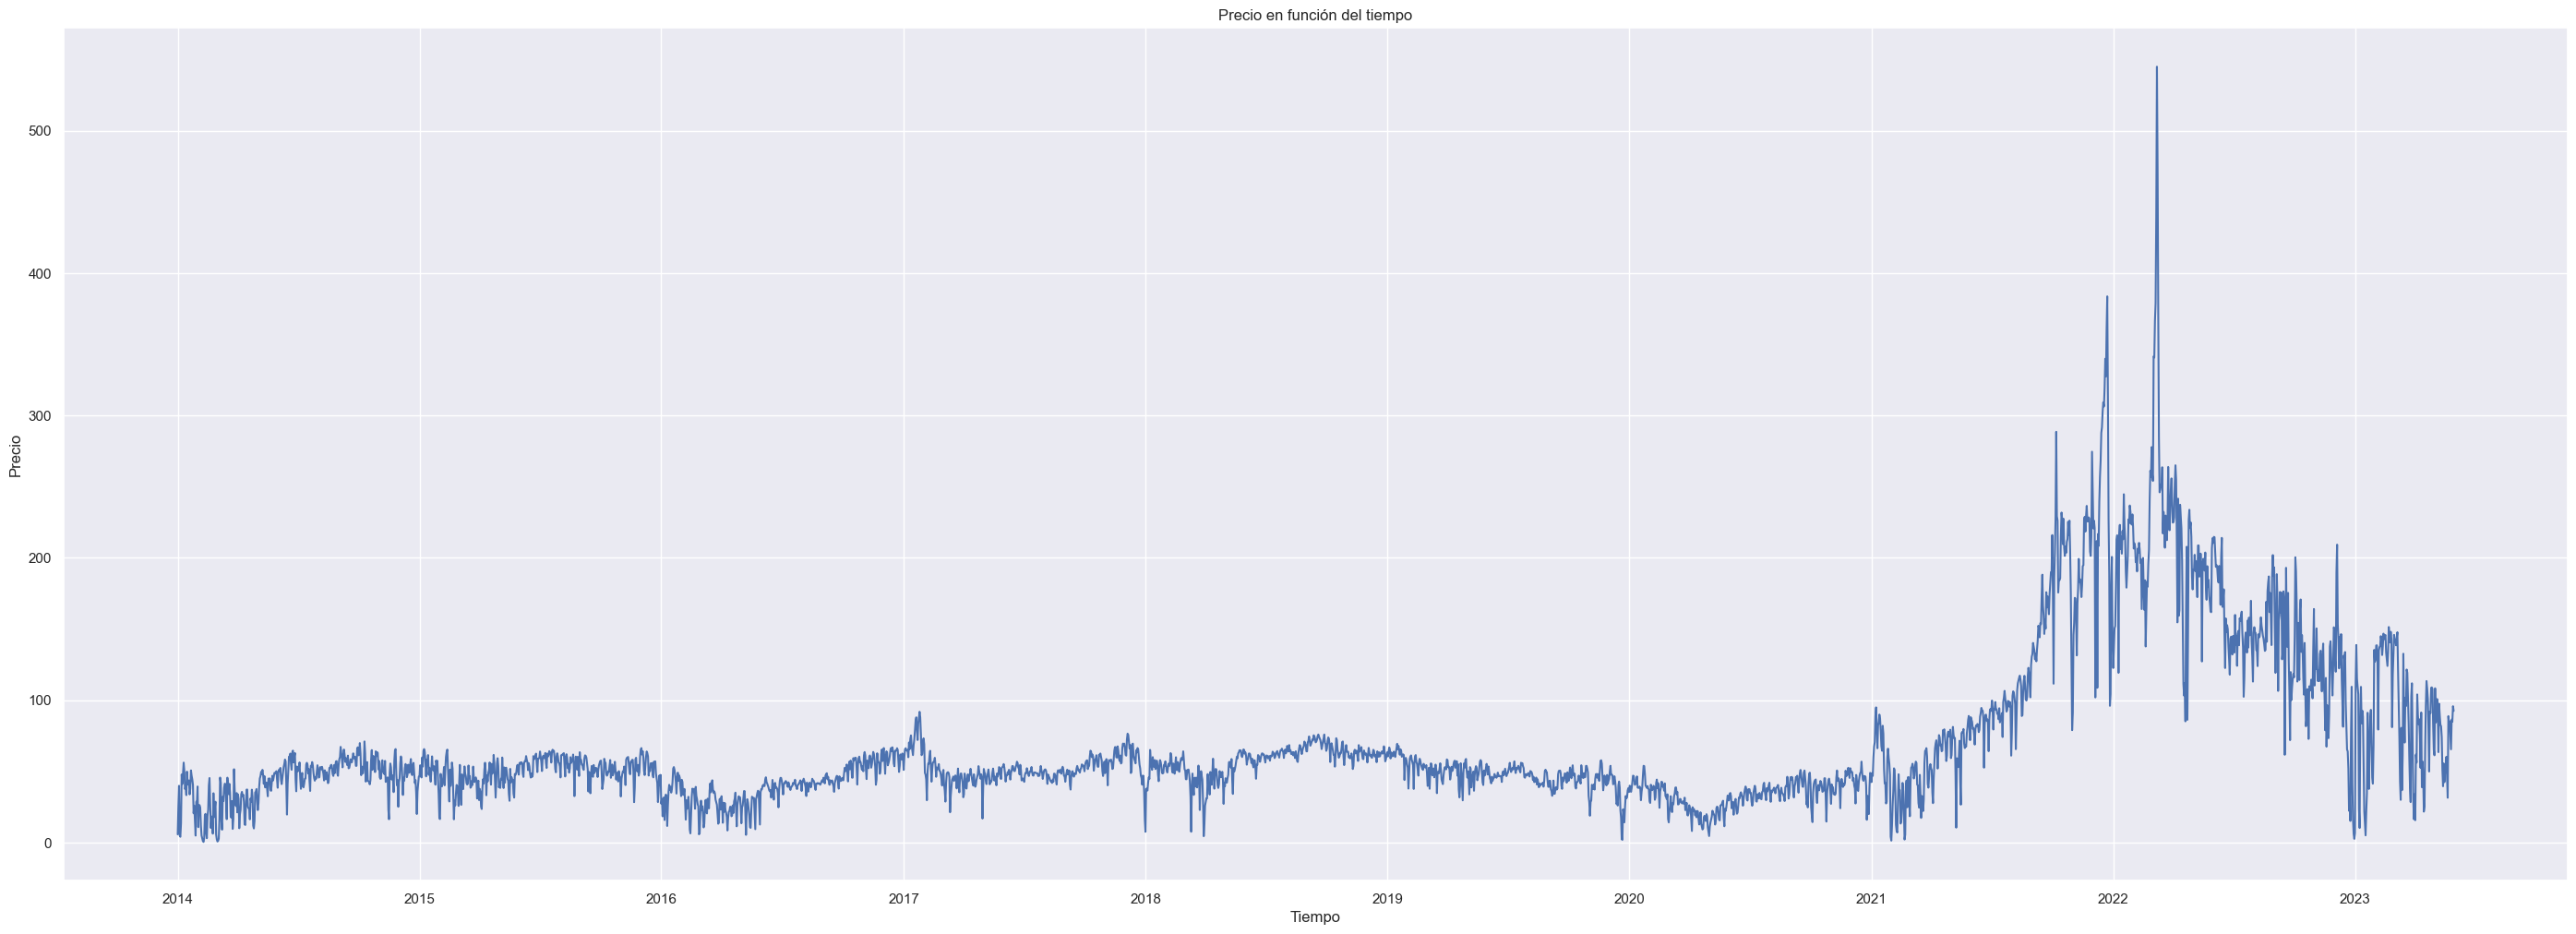

In [60]:
sns.lineplot(x=df['datetime'], y=df['value'])

# Personalizar el gráfico
plt.title('Precio en función del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

Gráfico agrupado por semana

In [61]:
df.head()

,value,datetime,mes,dia,week,year,date
0,5.808750,2013-12-31 23:00:00+00:00,12,31,1,2013,2013-12-31
1,25.280833,2014-01-01 23:00:00+00:00,1,1,1,2014,2014-01-01
2,39.924167,2014-01-02 23:00:00+00:00,1,2,1,2014,2014-01-02
3,4.992083,2014-01-03 23:00:00+00:00,1,3,1,2014,2014-01-03
4,4.091667,2014-01-04 23:00:00+00:00,1,4,1,2014,2014-01-04


In [62]:
df['week'] = pd.to_datetime(df['week'])

media_semanal = df.groupby(df['week'])['value'].mean()


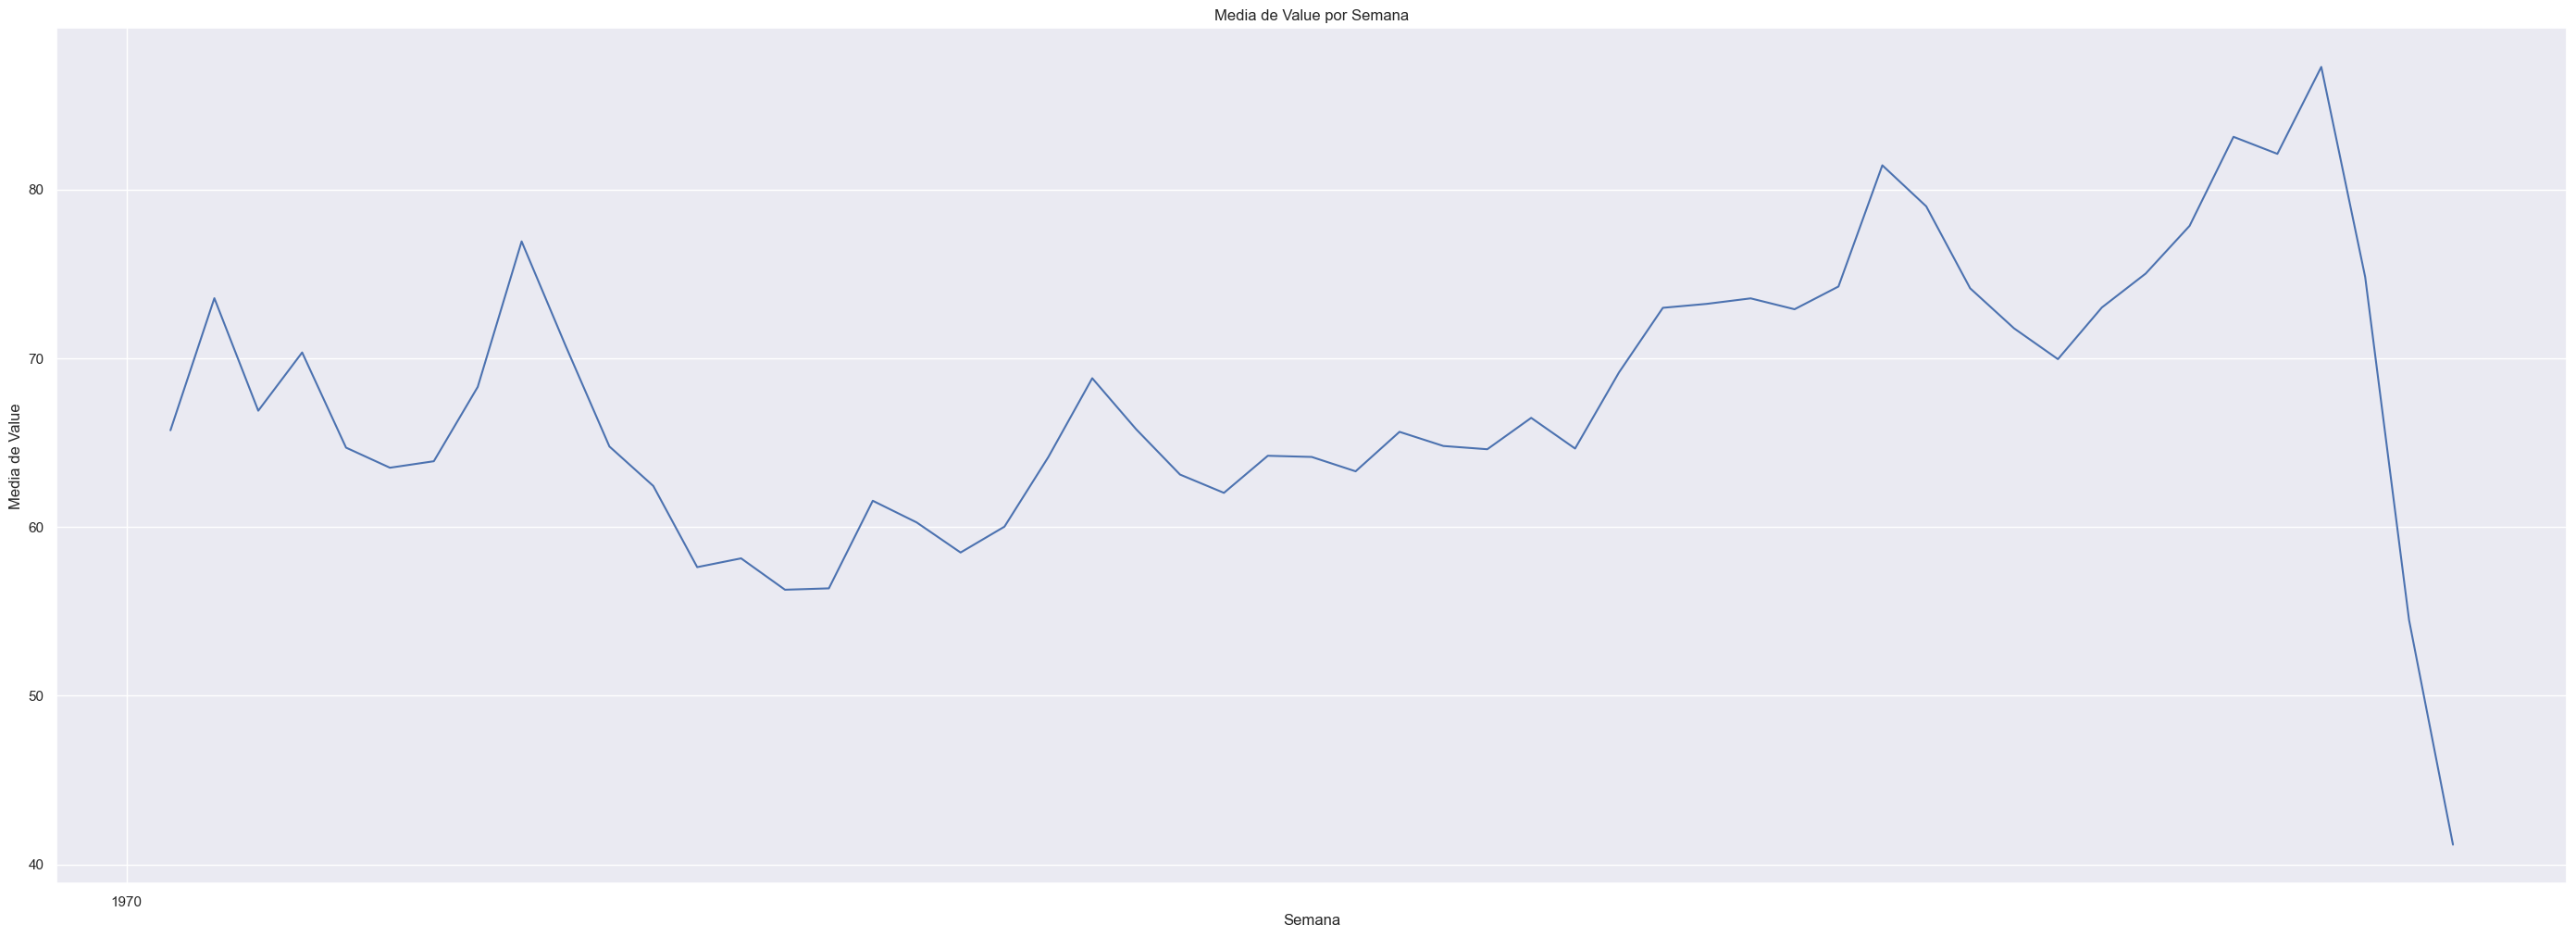

In [63]:
sns.lineplot(x=media_semanal.index, y=media_semanal.values)

# Personalizar el gráfico
plt.title('Media de Value por Semana')
plt.xlabel('Semana')
plt.ylabel('Media de Value')

# Mostrar el gráfico
plt.show()

Gráfico agrupado por mes

### Precio medio de la electricidad por año para cada mes

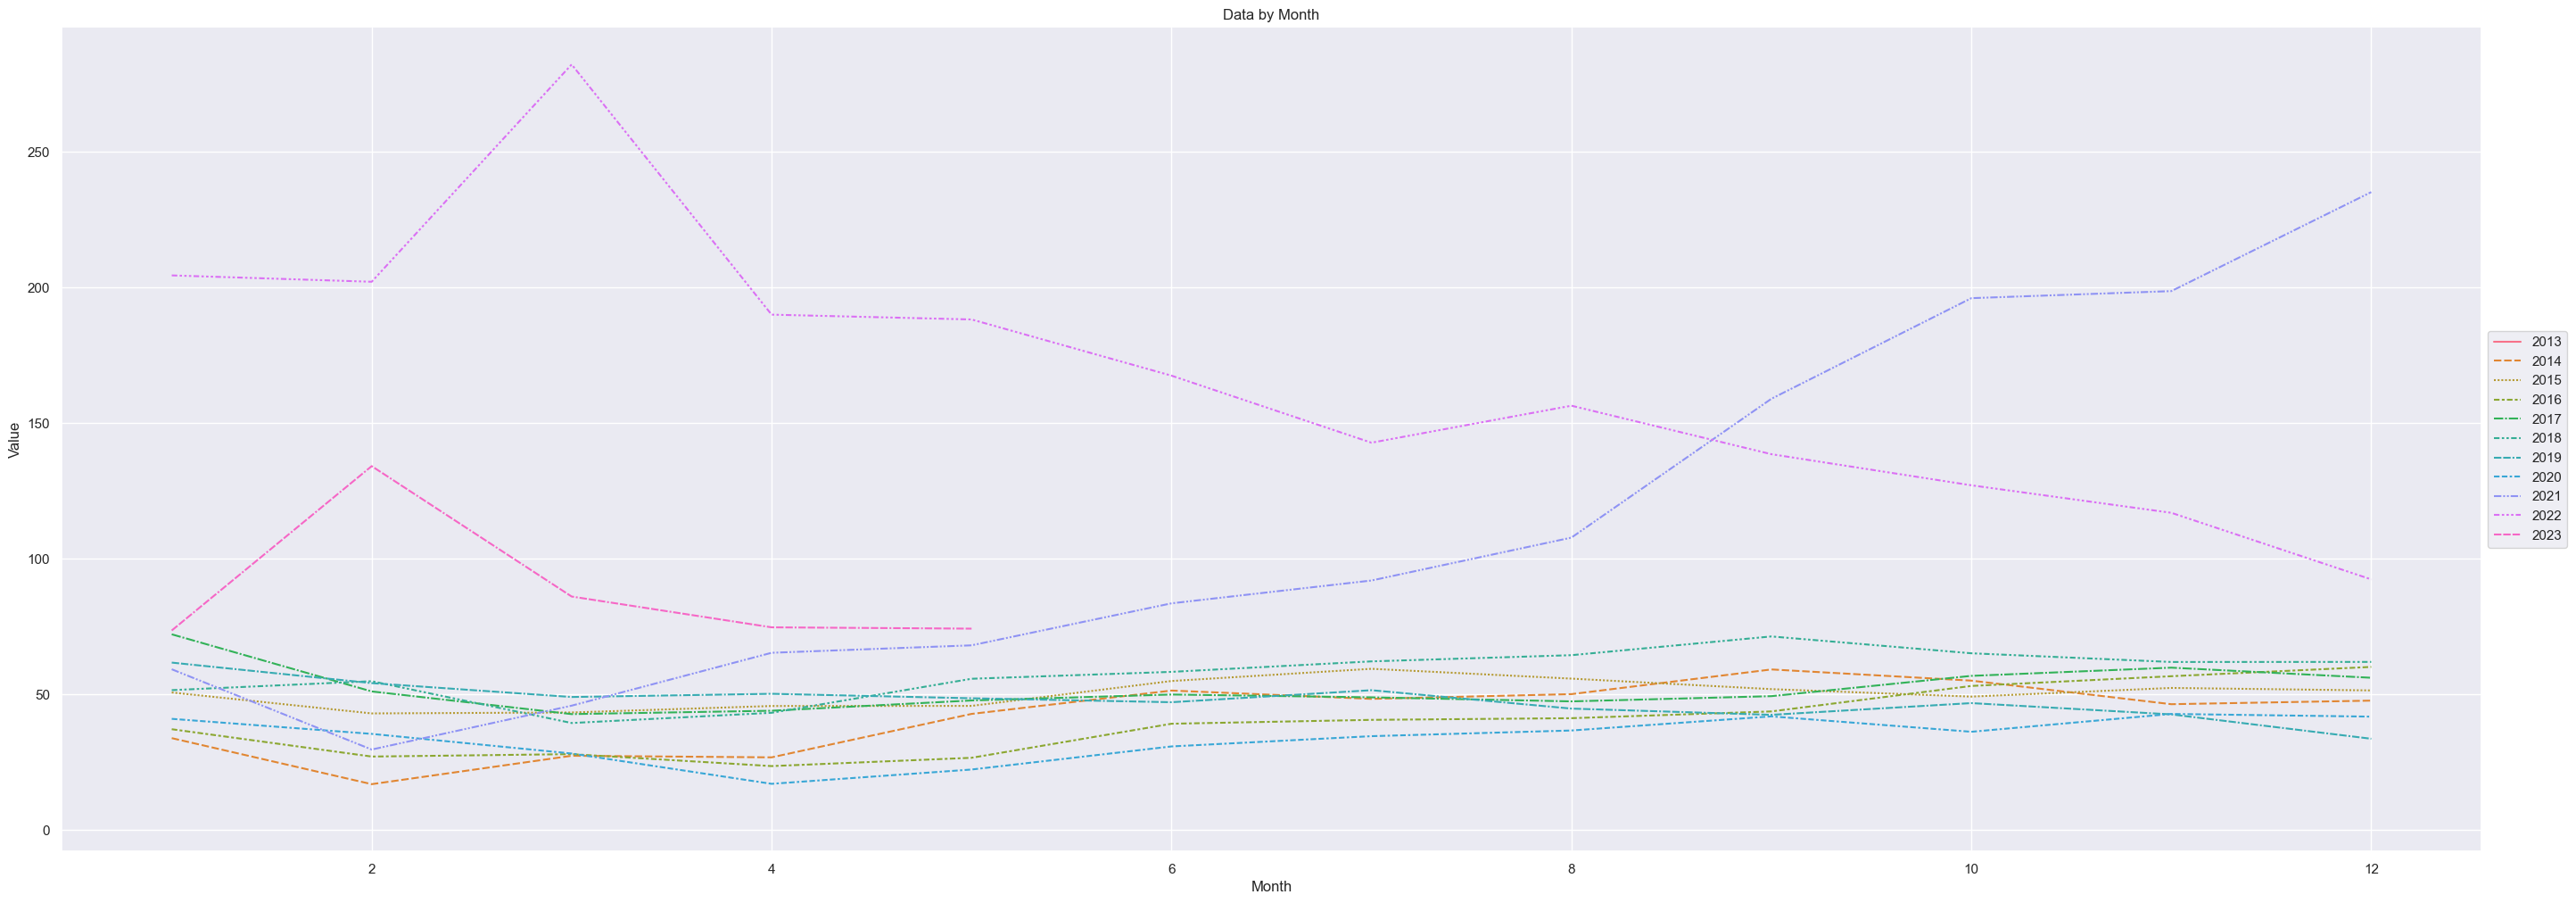

In [64]:
ax = sns.lineplot(data=df_pivot)

# Personalizar el gráfico
plt.title('Data by Month')
plt.xlabel('Month')
plt.ylabel('Value')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()

### Gas natural

In [65]:
gasn = pd.read_csv('data_materias/gas_natural.csv')

In [66]:
gasn['Fecha'] = pd.to_datetime(gasn['Fecha'], format='%d.%m.%Y')

In [67]:
#función para sustituir punto por coma

def punto (df,columna):
    df[columna] = df[columna].str.replace(',','.').astype(float)
    return df

In [68]:
gasn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     2479 non-null   datetime64[ns]
 1   Último    2479 non-null   object        
 2   Apertura  2479 non-null   object        
 3   Máximo    2479 non-null   object        
 4   Mínimo    2479 non-null   object        
 5   Vol.      2360 non-null   object        
 6   % var.    2479 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 135.7+ KB


In [69]:
columnas_transf = ['Último', 'Apertura', 'Máximo', 'Mínimo'] #'Vol.', '% var.']

In [70]:
for c in columnas_transf:
    gasn = punto(gasn,c)


In [71]:
gasn.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2023-05-30,2.317,2.347,2.372,2.308,NaN,"-1,36%"
1,2023-05-29,2.349,2.434,2.447,2.338,NaN,"-3,53%"
2,2023-05-28,2.435,2.418,2.441,2.417,NaN,"11,65%"
3,2023-05-26,2.181,2.292,2.298,2.143,"2,17K","-5,46%"
4,2023-05-25,2.307,2.413,2.441,2.258,"48,66K","-3,79%"


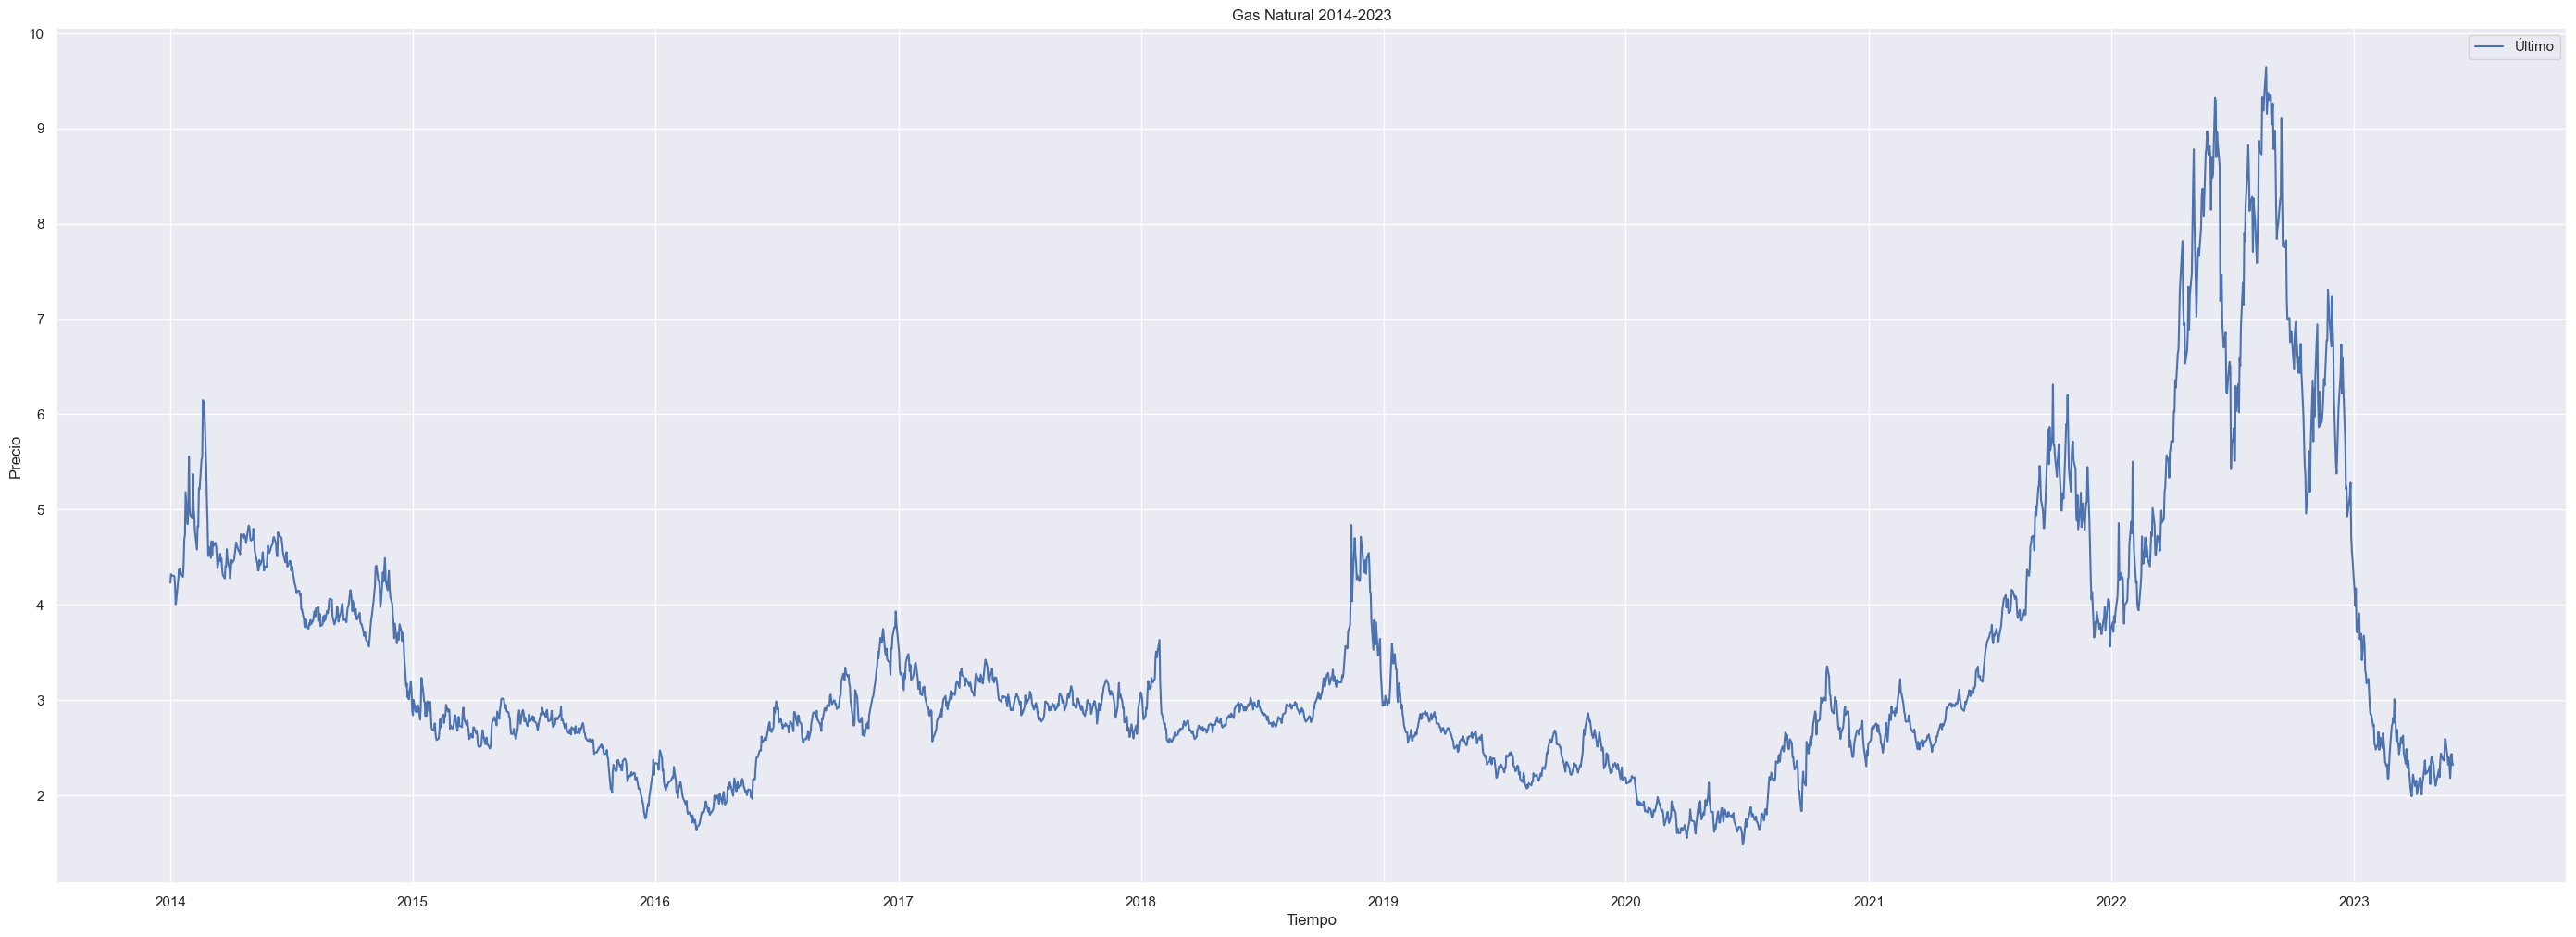

In [72]:
sns.lineplot(x=gasn.Fecha,y=gasn['Último'], data=gasn['Último'])

# Personalizar el gráfico
plt.title('Gas Natural 2014-2023')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(['Último'])

# Mostrar el gráfico
plt.show()

Esta subida de precios del gas natural en 2022 se debe a la invasión de Ucrania por parte de Rusia que ha afectado al mercado eneerg´rtico

Dado que las energías reonvables no pueden atender toda la demanda, necesitamos combstibles fósiles para producir electricidad

No solo esto si no que otra circunstancia que afecta a su precio es que ha caído la oferta

Causas del aumento de la demanda mundial de gas natural:
- demanda post-pandemia ha ido creciendo
- Europa utiliza gas natural para calentar las viviendas
- Cierre de plantas nucleares y de carbón

Cómo afecta el precio del gas al mercado eléctrico

En el mercado eléctrico, en particular, las tarifas que forman parte del mercado regulado sufren cambios (subidas y bajadas) en su precio que se fija diariamente, a través de una subasta, en la que las empresas generadoras, hacen sus ofertas para el día siguiente, en los diferentes tramos horarios.

En función de estas ofertas, los compradores pagarán a las empresas generadoras un precio marginal. Estas ofertas pueden resultar más baratas cuando provienen de energías renovables y más caras cuando provienen de combustibles fósiles (gas). Estas últimas influyen considerablemente en el precio marginal.

Para el año 2023

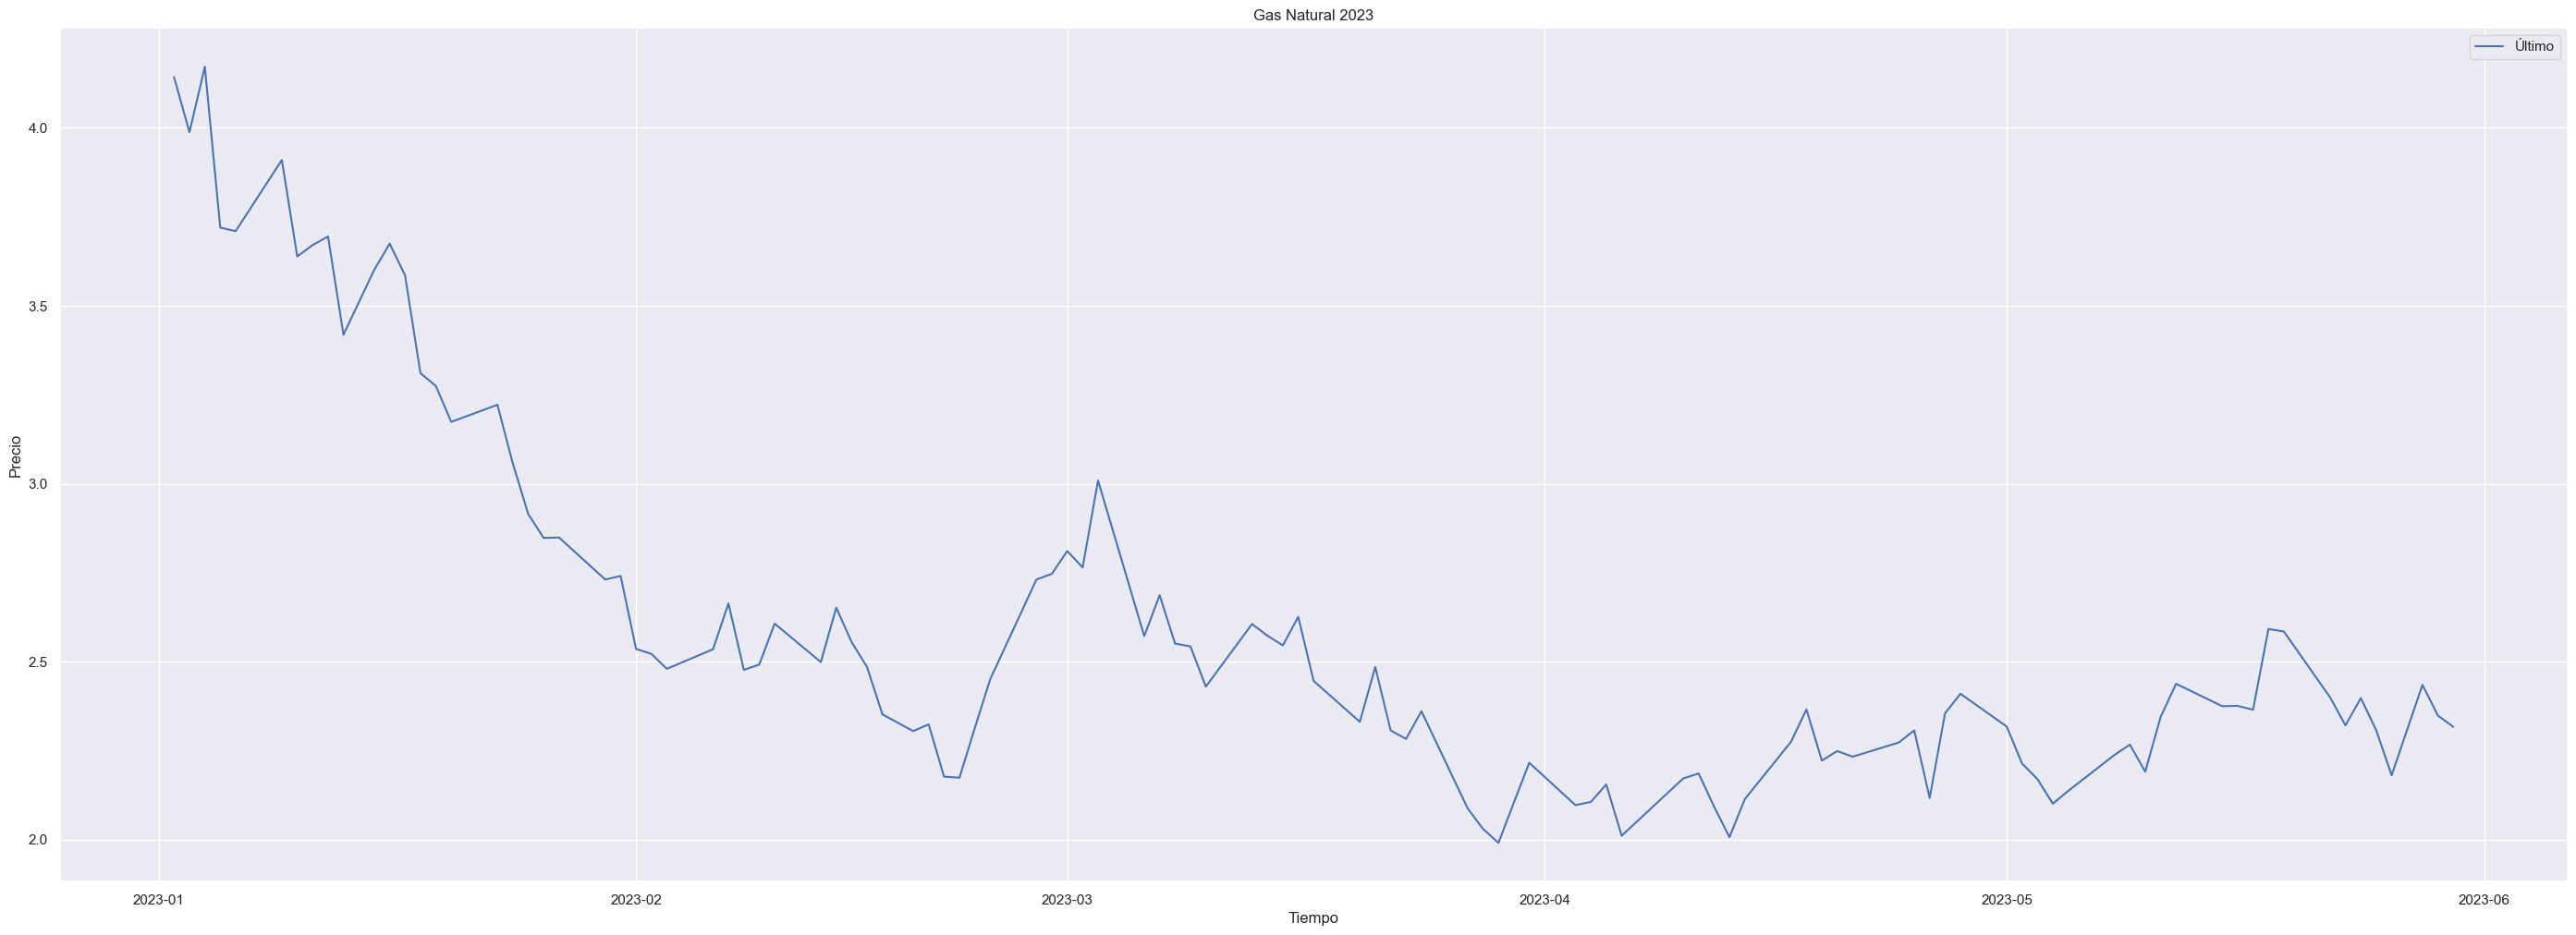

In [73]:
sns.lineplot(x=gasn_2023.Fecha,y=gasn_2023['Último'], data=gasn_2023['Último'])

# Personalizar el gráfico
plt.title('Gas Natural 2023')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(['Último'])

# Mostrar el gráfico
plt.show()

### Petroleo Brent

In [74]:
brent = pd.read_csv('data_materias/brent.csv')

In [75]:
brent.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.05.2023,"73,71","77,04","77,59","73,32","461,39K","-4,36%"
1,29.05.2023,"77,07","77,39","77,75","76,15","31,55K","0,16%"
2,26.05.2023,"76,95","76,09","77,35","75,73","150,62K","0,90%"
3,25.05.2023,"76,26","78,22","78,50","75,10","237,72K","-2,68%"
4,24.05.2023,"78,36","77,70","78,66","77,03","285,99K","1,98%"


In [76]:
brent['Fecha'] = pd.to_datetime(brent['Fecha'], format='%d.%m.%Y')

In [77]:
for c in columnas_transf:
    brent = punto(brent,c)

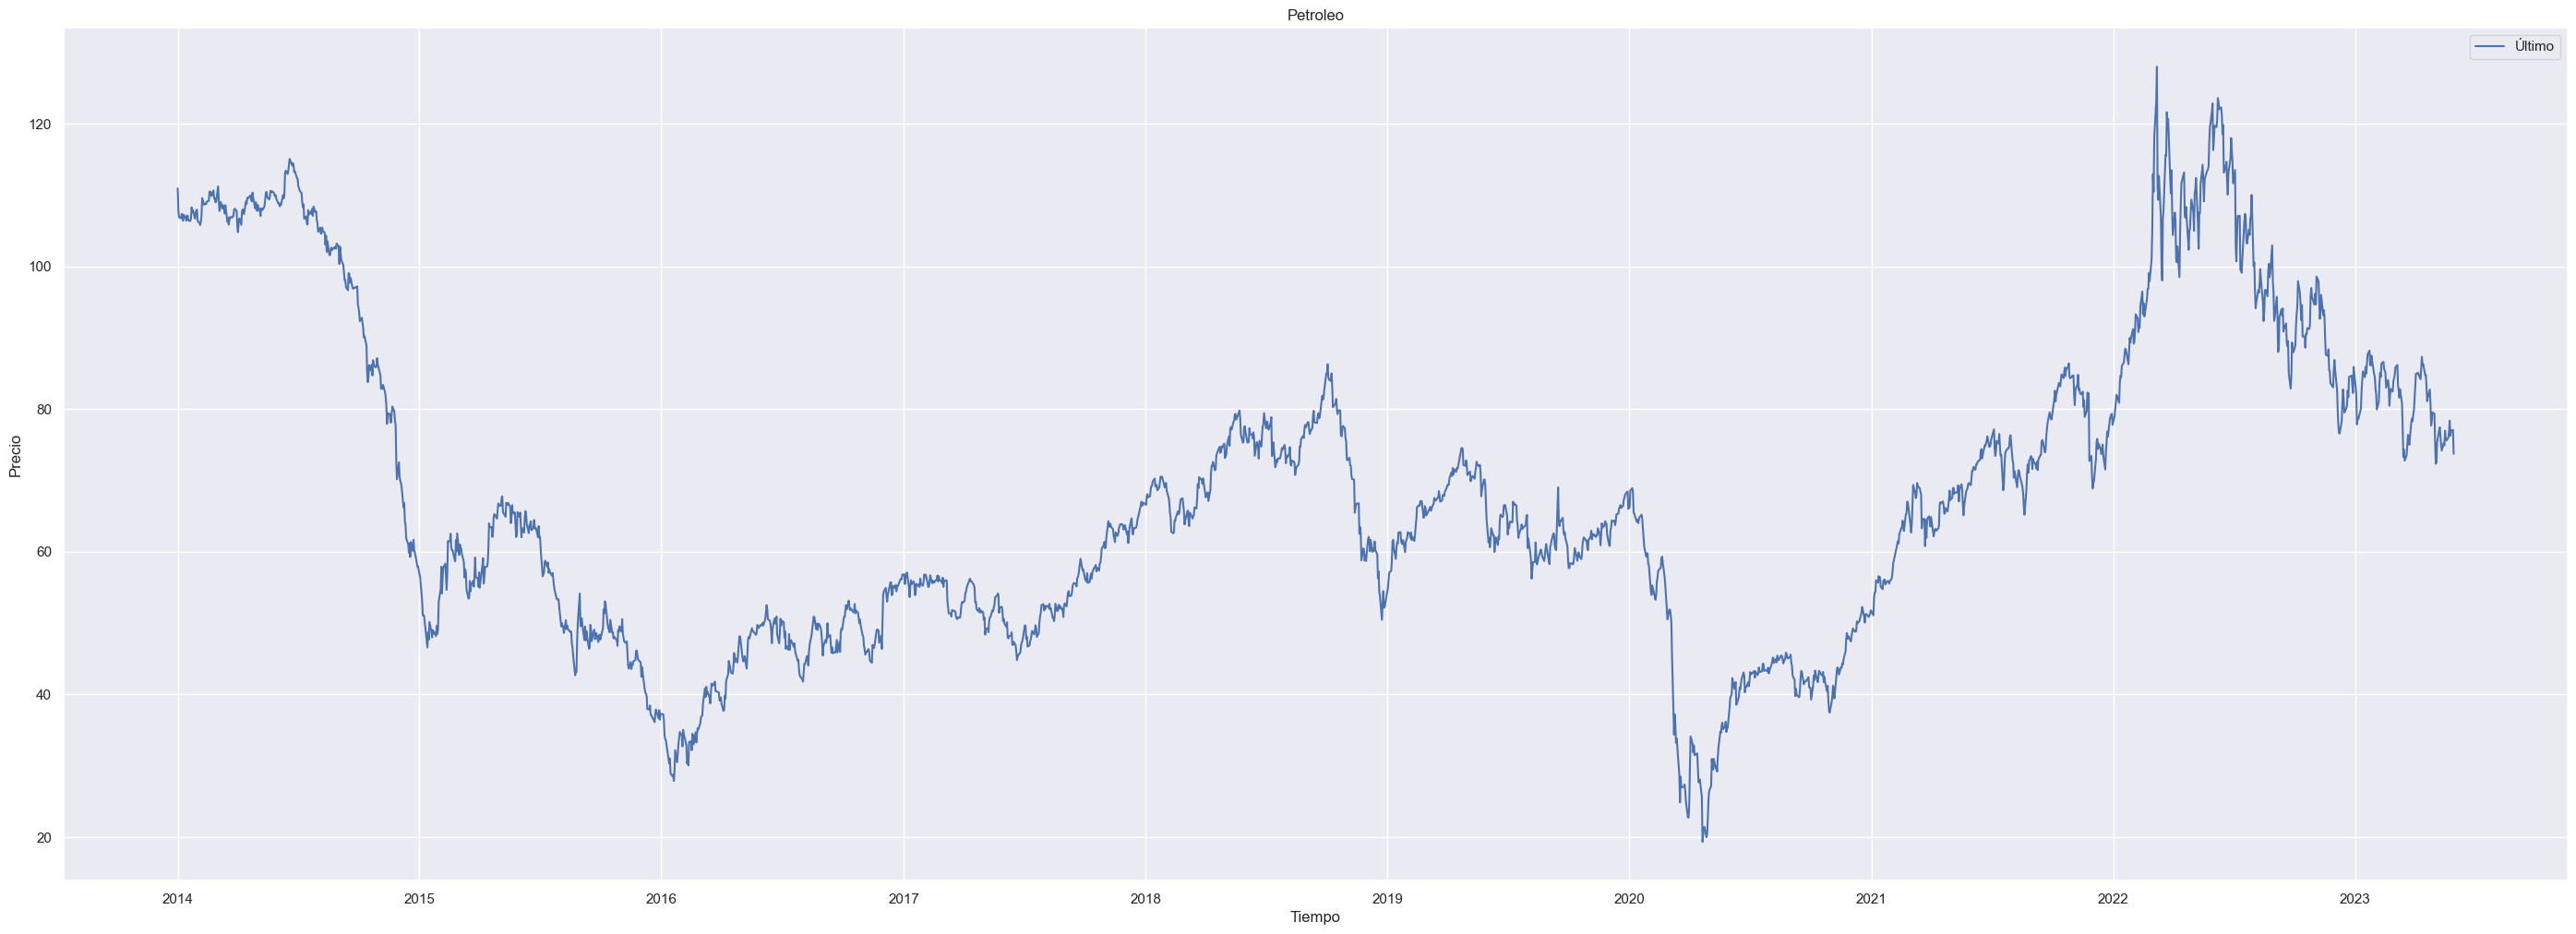

In [78]:
sns.lineplot(x=brent.Fecha,y=brent['Último'], data=brent['Último'])

# Personalizar el gráfico
plt.title('Petroleo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(['Último'])

# Mostrar el gráfico
plt.show()

### Precio de las emisiones de CO2

In [79]:
emisiones = pd.read_csv('data_materias/emisiones_co2.csv')

In [80]:
emisiones.head(
    
)

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.05.2023,"80,38","83,05","83,34","80,36","24,55K","-3,16%"
1,29.05.2023,"83,00","83,01","84,46","82,67","4,74K","-0,16%"
2,26.05.2023,"83,13","82,75","83,37","81,94","14,76K","0,61%"
3,25.05.2023,"82,63","85,03","85,15","82,63","20,74K","-2,55%"
4,24.05.2023,"84,79","85,81","86,26","84,55","13,80K","-1,18%"


In [81]:
emisiones.describe().T

,count,unique,top,freq
Fecha,2428,2428,30.05.2023,1
Último,2428,1574,"5,54",9
Apertura,2428,1563,"5,74",8
Máximo,2428,1555,"5,22",8
Mínimo,2428,1559,"5,81",10
Vol.,2413,850,"0,01K",142
% var.,2428,947,"0,00%",47


In [82]:
emisiones['Fecha'] = pd.to_datetime(emisiones['Fecha'], format='%d.%m.%Y')

In [83]:
for c in columnas_transf:
    emisiones = punto(emisiones,c)

Gráfico precio de emisiones CO2

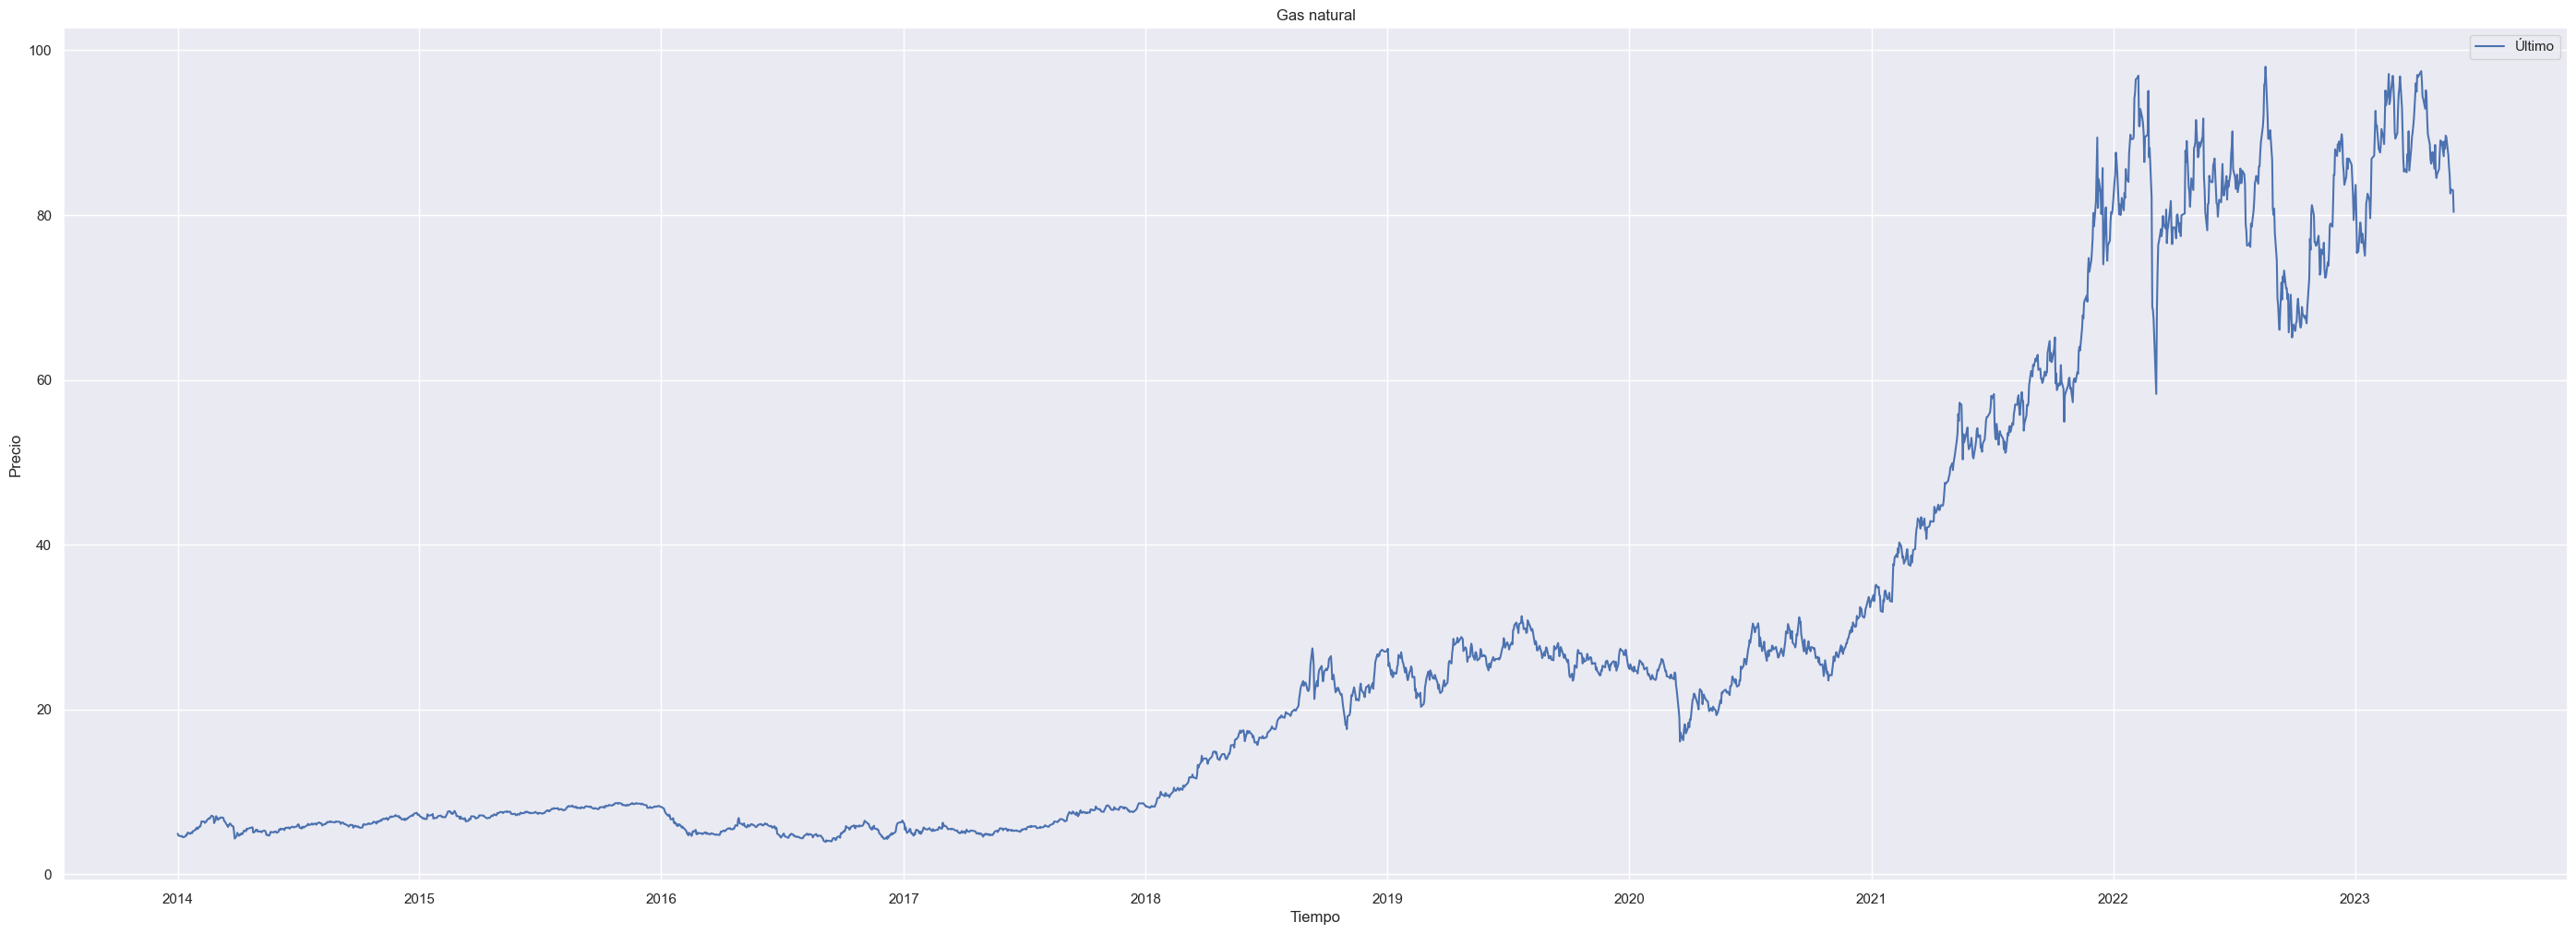

In [84]:
sns.lineplot(x=emisiones.Fecha,y=emisiones['Último'], data=emisiones['Último'])

# Personalizar el gráfico
plt.title('Gas natural')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend(['Último'])

# Mostrar el gráfico
plt.show()

### IBEX 35


In [85]:
ibex35 = pd.read_csv('data_other/ibex35.csv')

In [87]:
ibex35['Fecha'] = pd.to_datetime(ibex35['Fecha'], format='%d.%m.%Y')

In [89]:
ibex35.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2023-05-30,"9.167,50","9.189,00","9.248,30","9.156,00","111,50M","-0,14%"
1,2023-05-29,"9.180,10","9.263,10","9.271,10","9.146,60","59,24M","-0,12%"
2,2023-05-26,"9.191,10","9.137,80","9.210,90","9.048,20","99,20M","0,82%"
3,2023-05-25,"9.116,10","9.169,50","9.188,10","9.116,10","123,79M","-0,52%"
4,2023-05-24,"9.163,50","9.191,30","9.193,20","9.128,80","108,84M","-1,12%"


In [ ]:
#pasar a sistema yankee

def transformar_valor(columna):
    columna = columna.str.replace('.', '').str.replace(',', '.')
    columna = columna.astype(float)
    return columna


### Añadiendo factor COVID

Dejar esto para cuando ya se haya recolectado todos los datos!!

Confinamiento COVID --> 15 mar 2020 – 21 jun 2020

In [ ]:

#df['Confinamiento'] = df['date'].apply(lambda x: 1 if datetime.date(2020, 3, 15) <= x <= datetime.date(2020, 6, 21) else 0)